<a href="https://colab.research.google.com/github/Y-sebaei/Authorship-Recognition-For-Large-Language-Models/blob/main/Bachelor3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [ ]:
import pandas as pd

# Load JSON Lines file into a DataFrame
file_path = "Bachtrain2.jsonl"
df = pd.read_json(file_path, lines=True)


df.to_csv("dataset4.csv", index=False)


In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer


tokenized_text = [text.split() for text in df['text']]


word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)


word_embeddings = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0)
                   for words in tokenized_text]


tfidf_vectorizer = TfidfVectorizer()


tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

df['text_length'] = df['text'].apply(len)

In [ ]:
df.shape

(5705, 6)

In [ ]:
df.describe()

,label,id,text_length
count,5705.000000,5705.000000,5705.000000
mean,1.070465,28942.003681,2386.402454
std,1.066978,4608.143313,1813.189910
min,0.000000,25030.000000,194.000000
25%,0.000000,26456.000000,1349.000000
50%,1.000000,27494.000000,1746.000000
75%,2.000000,29187.000000,2413.000000
max,3.000000,41673.000000,13220.000000


In [ ]:
data_train = df.sample(frac=0.8, random_state=123)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
889,"During the time of Roman occupation, Britons w...",LLM,reddit,1,25284,1508
724,If you went back in time to Revolutionary Amer...,LLM,reddit,1,25119,1038
3676,"In an ideal situation, where the Earth was a p...",human,reddit,0,28071,1713
3335,Seeing as this question got popular while I wa...,human,reddit,0,27730,1517
3740,One that no one is mentioning is potentially t...,human,reddit,0,28135,1689


In [ ]:
data_test = df.drop(data_train.index)

In [ ]:
data_test.shape

(1141, 6)

In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
0,"During the time of Roman occupation, Britons w...",LLM,reddit,1,25284,1508
1,If you went back in time to Revolutionary Amer...,LLM,reddit,1,25119,1038
2,"In an ideal situation, where the Earth was a p...",human,reddit,0,28071,1713
3,Seeing as this question got popular while I wa...,human,reddit,0,27730,1517
4,One that no one is mentioning is potentially t...,human,reddit,0,28135,1689


In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,text,model,source,label,id,text_length
0,It's a misconception that most of the artworks...,human,reddit,0,27109,4278
1,"While i'm far from knowledgeable in that area,...",human,reddit,0,27110,3611
2,When the Nazis invaded Poland in 1939 and Engl...,human,reddit,0,27115,3276
3,Holy shit a question I can actually answer! I ...,human,reddit,0,27121,3932
4,The mental image that most people see when the...,human,reddit,0,27123,4549


In [ ]:
columns_to_ignore = ['label', 'source','id']
clf = setup(data=data_train, target='model', session_id=123, ignore_features=columns_to_ignore, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,model
2,Target type,Binary
3,Target mapping,"LLM: 0, human: 1"
4,Original data shape,"(4564, 6)"
5,Transformed data shape,"(5380, 3)"
6,Transformed train set shape,"(4010, 3)"
7,Transformed test set shape,"(1370, 3)"
8,Ignore features,3
9,Numeric features,1


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8632,0.8444,0.8632,0.8743,0.8571,0.6892,0.7097,1.1210
nb,Naive Bayes,0.8560,0.8449,0.8560,0.8707,0.8482,0.6700,0.6961,0.1540
knn,K Neighbors Classifier,0.7868,0.8032,0.7868,0.7845,0.7844,0.5351,0.5369,0.3350
et,Extra Trees Classifier,0.7865,0.8074,0.7865,0.8409,0.7585,0.4821,0.5636,0.5310
dt,Decision Tree Classifier,0.7442,0.6564,0.7442,0.8184,0.6985,0.3634,0.4708,0.1570
ridge,Ridge Classifier,0.7442,0.8445,0.7442,0.8184,0.6985,0.3634,0.4708,0.1900
rf,Random Forest Classifier,0.7442,0.8256,0.7442,0.8184,0.6985,0.3634,0.4708,0.6140
ada,Ada Boost Classifier,0.7442,0.6564,0.7442,0.8184,0.6985,0.3634,0.4708,0.1620
gbc,Gradient Boosting Classifier,0.7442,0.6564,0.7442,0.8184,0.6985,0.3634,0.4708,0.3010
lda,Linear Discriminant Analysis,0.7442,0.4684,0.7442,0.8184,0.6985,0.3634,0.4708,0.1680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8969,0.9020,0.8969,0.9052,0.8935,0.7685,0.7827
1,0.8469,0.8443,0.8469,0.8641,0.8380,0.6475,0.6776
2,0.8406,0.8196,0.8406,0.8568,0.8314,0.6331,0.6625
3,0.8750,0.8638,0.8750,0.8859,0.8699,0.7169,0.7360
4,0.8370,0.7968,0.8370,0.8513,0.8277,0.6240,0.6519
5,0.8589,0.8233,0.8589,0.8641,0.8544,0.6839,0.6965
6,0.8809,0.8941,0.8809,0.8906,0.8764,0.7316,0.7486
7,0.8746,0.8290,0.8746,0.8877,0.8691,0.7155,0.7374
8,0.8621,0.8378,0.8621,0.8698,0.8569,0.6893,0.7053


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8938,0.9020,0.8938,0.9068,0.8894,0.7594,0.7796
1,0.8562,0.8443,0.8562,0.8830,0.8464,0.6660,0.7065
2,0.8312,0.8196,0.8312,0.8556,0.8189,0.6064,0.6473
3,0.8688,0.8639,0.8688,0.8884,0.8614,0.6984,0.7291
4,0.8527,0.7968,0.8527,0.8806,0.8421,0.6556,0.6983
5,0.8746,0.8233,0.8746,0.8955,0.8676,0.7124,0.7438
6,0.8840,0.8941,0.8840,0.9021,0.8782,0.7354,0.7626
7,0.8715,0.8290,0.8715,0.8933,0.8641,0.7046,0.7375
8,0.8683,0.8380,0.8683,0.8882,0.8610,0.6980,0.7288


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


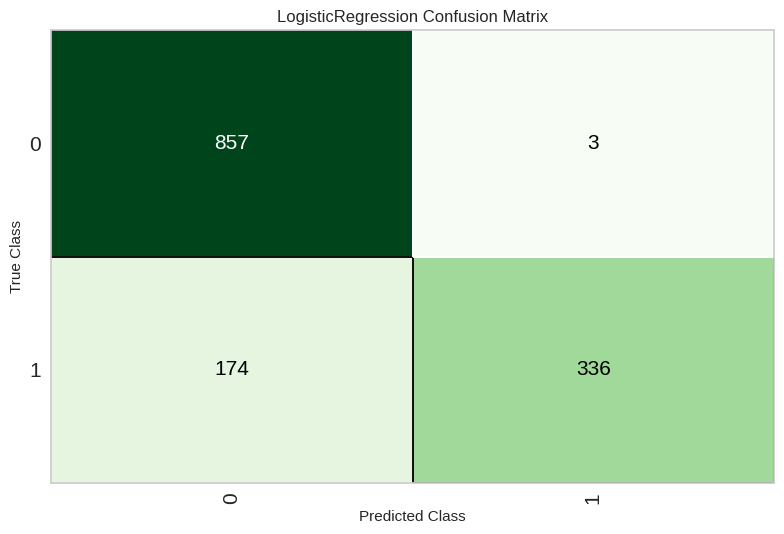

In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

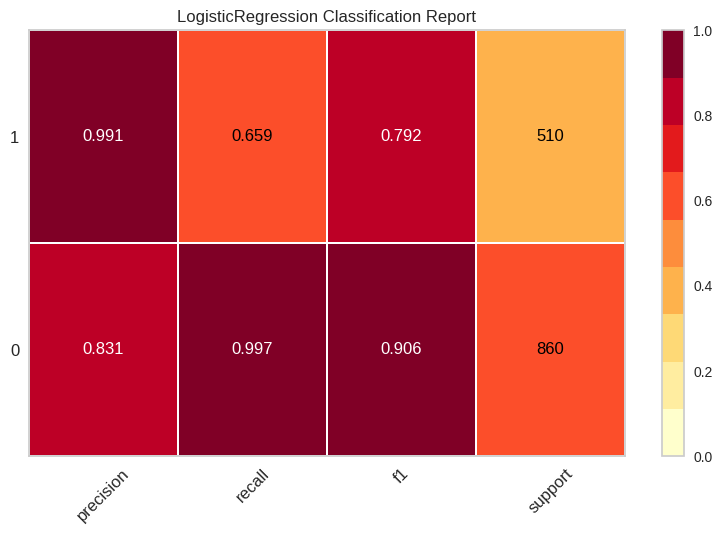

In [ ]:
plot_model(tuned_lr, plot = 'class_report')

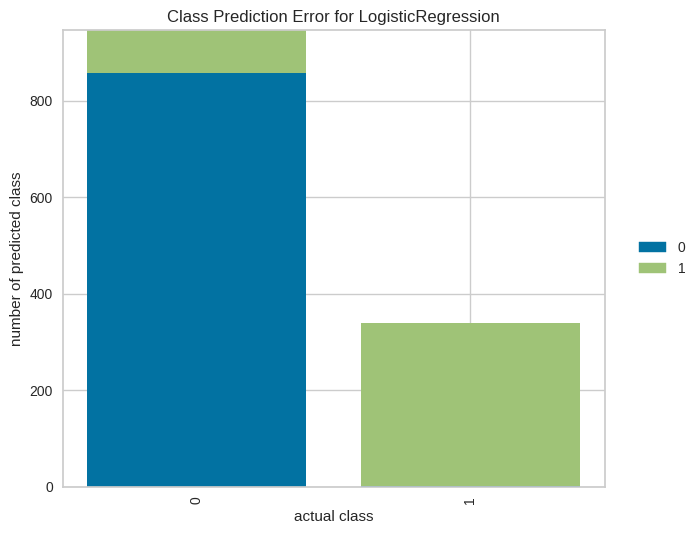

In [ ]:
plot_model(tuned_lr, plot = 'error')

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
data_test_filtered = data_test.drop(columns=['label', 'source','id', 'model'])

# Use predict_model() with filtered test data
predict_model(tuned_lr, data=data_test_filtered)

,text,text_length,prediction_label,prediction_score
0,It's a misconception that most of the artworks...,4278,human,0.7936
1,"While i'm far from knowledgeable in that area,...",3611,human,0.9801
2,When the Nazis invaded Poland in 1939 and Engl...,3276,human,0.9731
3,Holy shit a question I can actually answer! I ...,3932,human,0.9851
4,The mental image that most people see when the...,4549,human,0.8317
...,...,...,...,...
1136,\nWe present here results of a hydrodynamical ...,1424,LLM,0.7844
1137,\n\nThe Infrared Cloud Monitor for the MAGNUM ...,1077,LLM,0.8338
1138,\nWe investigate the possible connections betw...,1081,LLM,0.8333
1139,\nWe present the 3D soft X-ray cluster-AGN cro...,1423,LLM,0.7846


In [ ]:
final_lr = finalize_model(tuned_lr)

In [ ]:
print(final_lr)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['text_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=Non

In [ ]:
test_pred = predict_model(final_lr, data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8764,0.8402,0.8764,0.8959,0.8697,0.7155,0.7454


In [ ]:
test_pred.head()

,text,source,label,id,text_length,model,prediction_label,prediction_score
0,It's a misconception that most of the artworks...,reddit,0,27109,4278,human,human,0.9903
1,"While i'm far from knowledgeable in that area,...",reddit,0,27110,3611,human,human,0.9829
2,When the Nazis invaded Poland in 1939 and Engl...,reddit,0,27115,3276,human,human,0.9774
3,Holy shit a question I can actually answer! I ...,reddit,0,27121,3932,human,human,0.9870
4,The mental image that most people see when the...,reddit,0,27123,4549,human,human,0.9922


In [ ]:
test_pred.tail()

,text,source,label,id,text_length,model,prediction_label,prediction_score
1136,\nWe present here results of a hydrodynamical ...,arxiv,2,41648,1424,LLM,LLM,0.7901
1137,\n\nThe Infrared Cloud Monitor for the MAGNUM ...,arxiv,2,41660,1077,LLM,LLM,0.8349
1138,\nWe investigate the possible connections betw...,arxiv,2,41662,1081,LLM,LLM,0.8345
1139,\nWe present the 3D soft X-ray cluster-AGN cro...,arxiv,2,41664,1423,LLM,LLM,0.7903
1140,\n\nWe present new observations of the Spitzer...,arxiv,2,41671,1201,LLM,LLM,0.8199


In [ ]:
save_model(final_lr, 'final_lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['text_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                                     transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                           

In [ ]:
load_model('final_lr')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['text_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=n...
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('actual_estimator',
                 LogisticRegression(C=2.833, class_weight='balanced',
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
loaded_model = load_model('final_lr')


predictions = predict_model(loaded_model, data=data_test)


print(predictions)


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8764,0.8402,0.8764,0.8959,0.8697,0.7155,0.7454


                                                   text  source  label     id  \
0     It's a misconception that most of the artworks...  reddit      0  27109   
1     While i'm far from knowledgeable in that area,...  reddit      0  27110   
2     When the Nazis invaded Poland in 1939 and Engl...  reddit      0  27115   
3     Holy shit a question I can actually answer! I ...  reddit      0  27121   
4     The mental image that most people see when the...  reddit      0  27123   
...                                                 ...     ...    ...    ...   
1136  \nWe present here results of a hydrodynamical ...   arxiv      2  41648   
1137  \n\nThe Infrared Cloud Monitor for the MAGNUM ...   arxiv      2  41660   
1138  \nWe investigate the possible connections betw...   arxiv      2  41662   
1139  \nWe present the 3D soft X-ray cluster-AGN cro...   arxiv      2  41664   
1140  \n\nWe present new observations of the Spitzer...   arxiv      2  41671   

      text_length  model pr